In [1]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import statistics as st


# File to Load
mouse_data_to_load = "data1/mouse_drug_data.csv"
clinical_data_to_load = "data1/clinicaltrial_data.csv"

In [2]:
mouse_load_data=pd.read_csv(mouse_data_to_load)
clinical_load_data=pd.read_csv(clinical_data_to_load)
clinical_data=pd.merge(clinical_load_data,mouse_load_data,on="Mouse ID")


In [3]:
tumor_change=clinical_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean().reset_index(drop=False)
stand_err=clinical_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem().reset_index(drop=False)
tumor_change_pv=tumor_change.pivot(index='Timepoint',columns='Drug')
stand_err_pv=stand_err.pivot(index='Timepoint',columns='Drug')
tumor_change_pv.head(4)

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059

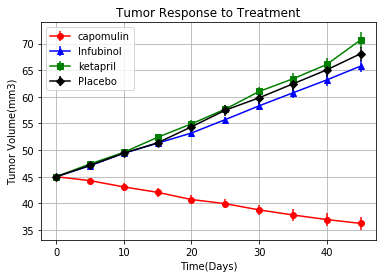

In [4]:
fig,ax=plt.subplots()
capomulin=ax.errorbar(tumor_change_pv.index,tumor_change_pv.iloc[:,0],yerr=stand_err_pv.iloc[:,0],marker="o",color='r')
Infubinol=ax.errorbar(tumor_change_pv.index,tumor_change_pv.iloc[:,2],yerr=stand_err_pv.iloc[:,2],marker="^",color='b')
ketapril=ax.errorbar(tumor_change_pv.index,tumor_change_pv.iloc[:,3],yerr=stand_err_pv.iloc[:,3],marker="s",color="g")
Placebo=ax.errorbar(tumor_change_pv.index,tumor_change_pv.iloc[:,5],yerr=stand_err_pv.iloc[:,5],marker="D",color="k")

ax.set_title("Tumor Response to Treatment")
ax.set_ylabel("Tumor Volume(mm3)")
ax.set_xlabel("Time(Days)")
ax.grid()
ax.legend(["capomulin","Infubinol","ketapril","Placebo"])
plt.savefig("chart1.png")
plt.show()

In [5]:
#Metastatic Spread During Treatment
meta_change=clinical_data.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean().reset_index(drop=False)
meta_change_pv=meta_change.pivot(index='Timepoint',columns='Drug')
stand_err_meta=clinical_data.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem().reset_index(drop=False)
stand_err_pv=stand_err_meta.pivot(index='Timepoint',columns='Drug')
meta_change.head(5)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


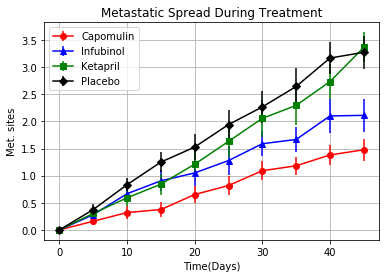

In [6]:
fig,ax=plt.subplots()
Capomulin=ax.errorbar(meta_change_pv.index,meta_change_pv.iloc[:,0],yerr=stand_err_pv.iloc[:,0],marker="o",color='r')
Infubinol=ax.errorbar(meta_change_pv.index,meta_change_pv.iloc[:,2],yerr=stand_err_pv.iloc[:,2],marker="^",color='b')
Ketapril=ax.errorbar(meta_change_pv.index,meta_change_pv.iloc[:,3],yerr=stand_err_pv.iloc[:,3],marker="s",color="g")
Placebo=ax.errorbar(meta_change_pv.index,meta_change_pv.iloc[:,5],yerr=stand_err_pv.iloc[:,5],marker="D",color="k")

ax.set_title("Metastatic Spread During Treatment")
ax.set_ylabel("Met. sites")
ax.set_xlabel("Time(Days)")
ax.grid()
ax.legend(["Capomulin","Infubinol","Ketapril","Placebo"])
plt.savefig("chart2.png")
plt.show()

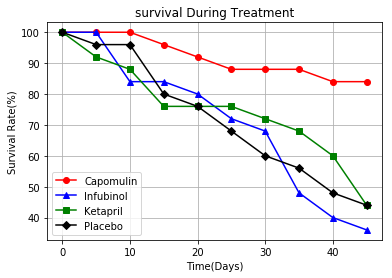

In [7]:

#mice survival rate
mice_ct=clinical_data.groupby(["Drug","Timepoint"])["Mouse ID"].count().reset_index(drop=False)
mice_ct_pv=mice_ct.pivot(index="Timepoint",columns="Drug")
mice_ct_per=mice_ct_pv.div(mice_ct_pv.iloc[0])*100

fig,ax=plt.subplots()
Capomulin=ax.errorbar(mice_ct_pv.index,mice_ct_per.iloc[:,0],marker='o',color='r')
Infubinol=ax.errorbar(mice_ct_pv.index,mice_ct_per.iloc[:,2],marker='^',color='b')
Ketapril=ax.errorbar(mice_ct_pv.index,mice_ct_per.iloc[:,3],marker="s",color="g")
Placebo=ax.errorbar(mice_ct_pv.index,mice_ct_per.iloc[:,5],marker="D",color="k")

ax.set_title("survival During Treatment")
ax.set_ylabel("Survival Rate(%)")
ax.set_xlabel("Time(Days)")
ax.grid()
ax.legend(["Capomulin","Infubinol","Ketapril","Placebo"])
plt.savefig("chart3.png")
plt.show()


In [8]:
#Summary Bar

drug_per_chg=(tumor_change_pv.iloc[-1]-tumor_change_pv.iloc[0])/tumor_change_pv.iloc[0]*100

In [9]:
drug_per_chg

                    Drug     
Tumor Volume (mm3)  Capomulin   -19.475303
                    Ceftamin     42.516492
                    Infubinol    46.123472
                    Ketapril     57.028795
                    Naftisol     53.923347
                    Placebo      51.297960
                    Propriva     47.241175
                    Ramicane    -22.320900
                    Stelasyn     52.085134
                    Zoniferol    46.579751
dtype: float64

In [10]:
df=pd.DataFrame(drug_per_chg).reset_index(drop=False)
df.drop("level_0",axis=1,inplace=True)


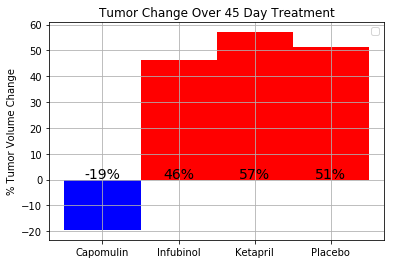

In [11]:
df1=df[(df['Drug']=="Capomulin")|(df['Drug']=="Infubinol") | (df['Drug']=="Ketapril") |(df['Drug']=="Placebo")|(df['Drug']=="Capomulin")].reset_index(drop=True)
x_axis=np.arange(len(df1))
plt.bar(x_axis,df1[0],align="center",width=1,color=['b','r','r',"r"])
labels=["19%","46",'57','51']
plt.legend("")
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
tickloco=[val for val in x_axis]
plt.xticks(tickloco,df1["Drug"])
for i in x_axis:
    plt.text(i,0+.50,str(int(df1.iloc[i,1]))+"%",fontsize=14,ha="center")
plt.grid()

plt.savefig("chart4.png")
plt.show()

Analysis:
    Capomulin is the only effective drug in reducing tumor, therefore should be promoted for further studies.
    Infubinol and Ketapril should be abadoned.

##### 